## Cat and Dog Classification

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/cats_and_dogs_filtered.zip"

Archive:  /content/gdrive/My Drive/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/

In [ ]:
train_dir = 'cats_and_dogs_filtered/train/'
validation_dir = 'cats_and_dogs_filtered/validation/'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(os.listdir(train_dir))
print(os.listdir(validation_dir))

['cats', 'dogs']
['cats', 'dogs']


In [ ]:
#Training images for Cats and Dogs
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#validation images for Cats and Dogs
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_frames = os.listdir(train_cats_dir)
train_dog_frames = os.listdir(train_dogs_dir)

#Viewing the first 10 filenames
print(train_cat_frames[:10])
print(train_dog_frames[:10])

['cat.546.jpg', 'cat.757.jpg', 'cat.726.jpg', 'cat.151.jpg', 'cat.598.jpg', 'cat.897.jpg', 'cat.587.jpg', 'cat.771.jpg', 'cat.565.jpg', 'cat.20.jpg']
['dog.235.jpg', 'dog.587.jpg', 'dog.655.jpg', 'dog.568.jpg', 'dog.770.jpg', 'dog.785.jpg', 'dog.589.jpg', 'dog.545.jpg', 'dog.663.jpg', 'dog.428.jpg']


In [ ]:
print("Number of training cats images: ", len(os.listdir(train_cats_dir)))
print("Number of training dogs images: ", len(os.listdir(train_dogs_dir)))

print("Number of validation cats images: ", len(os.listdir(validation_cats_dir)))
print("Number of validation dogs images: ", len(os.listdir(validation_dogs_dir)))

Number of training cats images:  1000
Number of training dogs images:  1000
Number of validation cats images:  500
Number of validation dogs images:  500


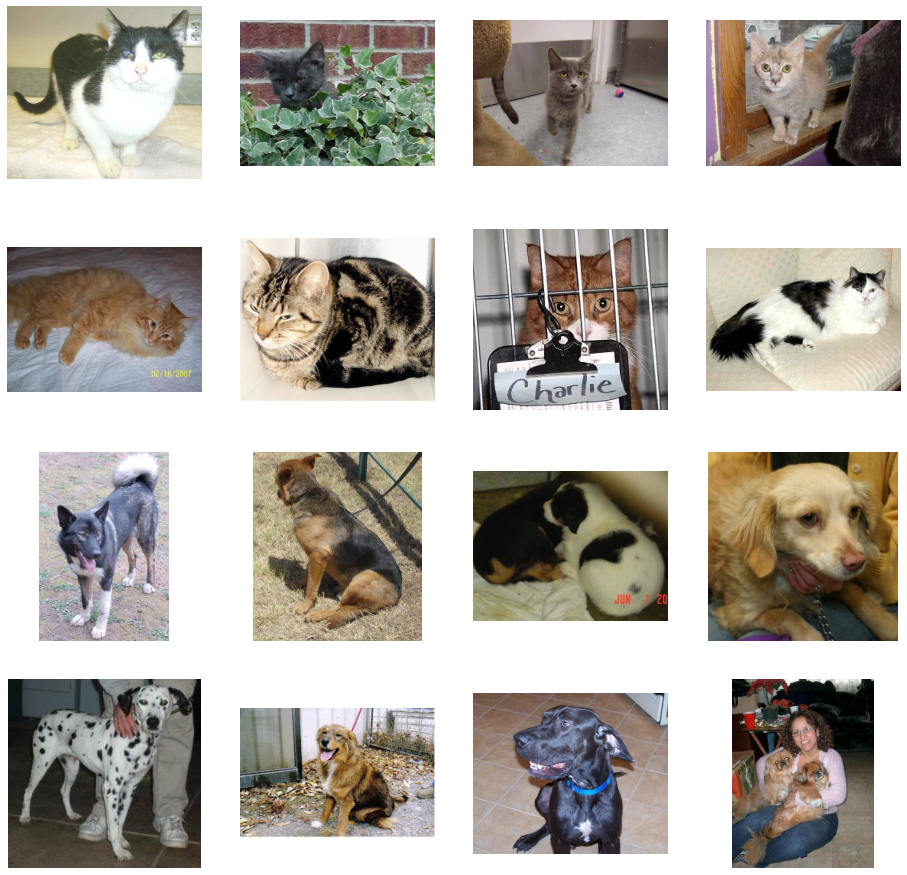

In [ ]:
%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pic = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_frames[ pic_index-8:pic_index] 
               ]

next_dog_pic = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_frames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pic+next_dog_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = npimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir(train_cats_dir):
    
    img = npimg.imread(train_cats_dir+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

print(np.mean(d1))
print(np.mean(d2))

417.0
500.0


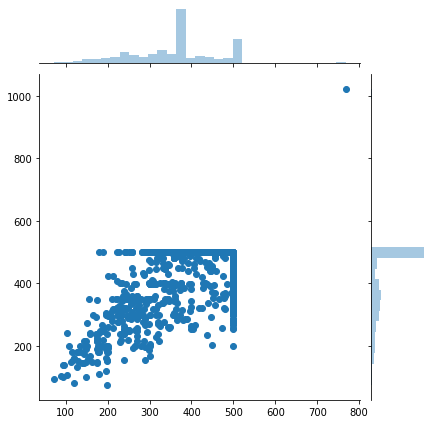

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization ,Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_size = (150, 150)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,       # Rotate the image 20 degrees
    width_shift_range=0.10,  # Shift the image width by a max of 5%
    height_shift_range=0.10, # Shift the image height by a max of 5%
    rescale=1./255,          # Rescale the image by normalzing it.
    shear_range=0.1,         # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1,          # Zoom in by 10% max
    horizontal_flip=True,    # Allow horizontal flipping
    fill_mode='nearest'      # Fill in missing pixels with the nearest filled value
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=20,
    color_mode='rgb',
    class_mode='binary'
)

validation_gen = datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=20,
    color_mode='rgb',
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 32)       

In [ ]:
history = model.fit_generator(train_gen, epochs=50, validation_data=validation_gen)

Epoch 1/50
100/100 [==============================] - 20s 201ms/step - loss: 0.6951 - accuracy: 0.4765 - val_loss: 0.6928 - val_accuracy: 0.5310
Epoch 2/50
100/100 [==============================] - 19s 195ms/step - loss: 0.6939 - accuracy: 0.4920 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/50
100/100 [==============================] - 19s 195ms/step - loss: 0.6933 - accuracy: 0.4985 - val_loss: 0.6926 - val_accuracy: 0.5880
Epoch 4/50
100/100 [==============================] - 20s 197ms/step - loss: 0.6932 - accuracy: 0.5285 - val_loss: 0.6914 - val_accuracy: 0.5030
Epoch 5/50
100/100 [==============================] - 20s 197ms/step - loss: 0.6896 - accuracy: 0.5310 - val_loss: 0.6810 - val_accuracy: 0.6090
Epoch 6/50
100/100 [==============================] - 19s 195ms/step - loss: 0.6914 - accuracy: 0.5440 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 7/50
100/100 [==============================] - 19s 194ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6618 - val_ac

In [ ]:
model.save('mymodel.h5')

In [ ]:
print (train_gen.class_indices)

labels = '\n'.join(sorted(train_gen.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'cats': 0, 'dogs': 1}


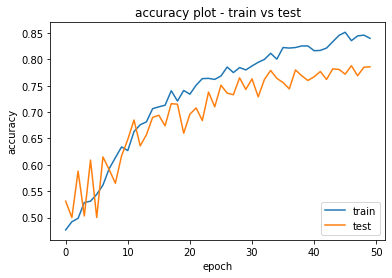

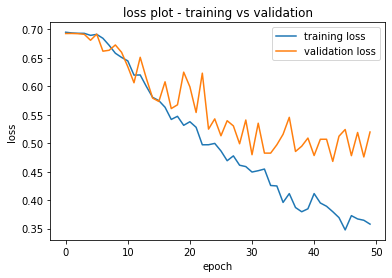

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model.save('saved_model_dir')
converter = tensorflow.lite.TFLiteConverter.from_saved_model('saved_model_dir')
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model_dir/assets


306892

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=20)
  
  print(classes)
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving 3.jpeg to 3 (1).jpeg
[[1.]]
3.jpeg is a dog
